# Further Analysis of Models

## Table of Contents

## Import Modules

In [24]:
%pip install datasets rouge-score
%pip install rouge
%pip install pickle5
%pip install iteration_utilities
import pickle5 as pickle
from rouge import Rouge
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from iteration_utilities import duplicates
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
import nltk
nltk.download('punkt')
import numpy as np
import matplotlib.pyplot as plt
import statistics
from statistics import mean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
from datasets import load_dataset, load_metric
import pandas as pd

# open a file, where you stored the pickled data
DATA_PATH = "/content"

# Predictions from 1st split
file1 = open(DATA_PATH+'/comparisons_BART_nodups.csv')
file2 = open(DATA_PATH+'/comparisons_T5_nodups.csv')
file3 = open(DATA_PATH+'/comparisons_Peg_nodups.csv',)
file4 = open(DATA_PATH+'/decoded_predictions_BART_nodups.csv')
file5 = open(DATA_PATH+'/decoded_predictions_T5_nodups.csv')
file6 = open(DATA_PATH+'/decoded_predictions_Pegasus_nodups.csv')
file8 = open(DATA_PATH+'/comparisons_Prophetnet_nodups.csv')
file9 = open(DATA_PATH+'/decoded_predictions_Prophetnet_nodups.csv')

# Predictions from 2nd split
f1 = open(DATA_PATH+'/comparisons_BART_nodups1.csv')
f2 = open(DATA_PATH+'/comparisons_T5_nodups1.csv')
f3 = open(DATA_PATH+'/comparisons_Peg_nodups1.csv',)
f4 = open(DATA_PATH+'/decoded_predictions_BART_nodups1.csv')
f5 = open(DATA_PATH+'/decoded_predictions_T5_nodups1.csv')
f6 = open(DATA_PATH+'/decoded_predictions_Pegasus_nodups1.csv')
f8 = open(DATA_PATH+'/comparisons_Prophetnet_nodups1.csv')
f9 = open(DATA_PATH+'/decoded_predictions_Prophetnet_nodups1.csv')

# Predictions from 3rd split
fi1 = open(DATA_PATH+'/comparisons_BART_nodups2.csv')
fi2 = open(DATA_PATH+'/comparisons_T5_nodups2.csv')
fi3 = open(DATA_PATH+'/comparisons_Peg_nodups2.csv',)
fi4 = open(DATA_PATH+'/decoded_predictions_BART_nodups2.csv')
fi5 = open(DATA_PATH+'/decoded_predictions_T5_nodups2.csv')
fi6 = open(DATA_PATH+'/decoded_predictions_Pegasus_nodups2.csv')
fi8 = open(DATA_PATH+'/comparisons_Prophetnet_nodups2.csv')
fi9 = open(DATA_PATH+'/decoded_predictions_Prophetnet_nodups2.csv')

# Extrinsic Scores
intrinsic1 = open(DATA_PATH+'/Intrinsic1.csv')
intrinsic2 = open(DATA_PATH+'/Intrinsic2.csv')
intrinsic3 = open(DATA_PATH+'/Intrinsic3.csv')
intrinsic4 = open(DATA_PATH+'/Intrinsic4.csv')
intrinsic5 = open(DATA_PATH+'/Intrinsic5.csv')
intrinsic6 = open(DATA_PATH+'/Intrinsic11.csv')
intrinsic7 = open(DATA_PATH+'/Intrinsic7.csv')
intrinsic8 = open(DATA_PATH+'/Intrinsic8.csv')
intrinsic9 = open(DATA_PATH+'/Intrinsic9.csv')
intrinsic10 = open(DATA_PATH+'/Intrinsic10.csv')

#pickled file
file7 = open(DATA_PATH+'/tac_test_dataset_nodups.pickle', 'rb')
f7 = open(DATA_PATH+'/tac_test_dataset_nodups1.pickle', 'rb')
fi7 = open(DATA_PATH+'/tac_test_dataset_nodups2.pickle', 'rb')

# dump information to that file
bart_comp = pd.read_csv(file1)
t5_comp = pd.read_csv(file2)
peg_comp = pd.read_csv(file3)
bart_preds = pd.read_csv(file4)
t5_preds = pd.read_csv(file5)
peg_preds = pd.read_csv(file6)
proph_comp = pd.read_csv(file8)
proph_preds = pd.read_csv(file9)

# dump information to that file
bart_comp1 = pd.read_csv(f1)
t5_comp1 = pd.read_csv(f2)
peg_comp1 = pd.read_csv(f3)
bart_preds1 = pd.read_csv(f4)
t5_preds1 = pd.read_csv(f5)
peg_preds1 = pd.read_csv(f6)
proph_comp1 = pd.read_csv(f8)
proph_preds1 = pd.read_csv(f9)

# dump information to that file
bart_comp2 = pd.read_csv(fi1)
t5_comp2 = pd.read_csv(fi2)
peg_comp2 = pd.read_csv(fi3)
bart_preds2 = pd.read_csv(fi4)
t5_preds2 = pd.read_csv(fi5)
peg_preds2 = pd.read_csv(fi6)
proph_comp2 = pd.read_csv(fi8)
proph_preds2 = pd.read_csv(fi9)

# dump information to that file
intrinsic1 = pd.read_csv(intrinsic1)
intrinsic2 = pd.read_csv(intrinsic2)
intrinsic3 = pd.read_csv(intrinsic3)
intrinsic4 = pd.read_csv(intrinsic4)
intrinsic5 = pd.read_csv(intrinsic5)
intrinsic6 = pd.read_csv(intrinsic6)
intrinsic7 = pd.read_csv(intrinsic7)
intrinsic8 = pd.read_csv(intrinsic8)
intrinsic9 = pd.read_csv(intrinsic9)
intrinsic10 = pd.read_csv(intrinsic10)

# dump information to that file
tac_test = pickle.load(file7)
tac_test1 = pickle.load(f7)
tac_test2 = pickle.load(fi7)

# reset index of randomly collected df
tac_test = tac_test.reset_index(drop = True)

In [27]:
# View bart
bart_comp1.head()

,Unnamed: 0,BART Prediction,Summary,Original Text
0,0,upcloud will guarantee 100 virtual server and network availability to the user,the service guarantees 100 virtual server and network availability to the customer,upcloud will guarantee 100 virtual server and network availability to the customer the network will be deemed available if upcloud’s routers and switches are available and responding properly
1,1,facebook is used for advertising,you are being tracked via social media cookies,cookies de réseaux sociaux facebook twitter linkedin instagram youtube pinterest nbsp générés par les boutons de partage
2,2,the court of law governing the terms is in netherlands,the court of law governing the terms is in location netherlands,these terms of use shall be governed by and construed in accordance with the laws of the netherlands
3,3,this service employs third party crawlers but with opt out instructions,no spidering or crawling,you may only use a crawler to crawl this web site as permitted by this web site’s robots txt protocol and ibm may block any crawlers in its sole discretion the use authorized under this agreement is non commercial in nature e g you may not sell the content you access on or through this web site all other use of this site is prohibited
4,4,the court of law governing the terms is in netherlands,the court of law governing the terms is in location netherlands,these terms of use shall be governed by and construed in accordance with the laws of the netherlands


In [28]:
# Delete first columns
t5_comp = t5_comp.iloc[: , 1:]
bart_comp = bart_comp.iloc[: , 1:]
peg_comp = peg_comp.iloc[: , 1:]
bart_preds = bart_preds.iloc[: , 1:]
t5_preds = t5_preds.iloc[: , 1:]
peg_preds = peg_preds.iloc[: , 1:]
proph_comp = proph_comp.iloc[: , 1:]
proph_preds = proph_preds.iloc[: , 1:]

t5_comp1 = t5_comp1.iloc[: , 1:]
bart_comp1 = bart_comp1.iloc[: , 1:]
peg_comp1 = peg_comp1.iloc[: , 1:]
bart_preds1 = bart_preds1.iloc[: , 1:]
t5_preds1 = t5_preds1.iloc[: , 1:]
peg_preds1 = peg_preds1.iloc[: , 1:]
proph_comp1 = proph_comp1.iloc[: , 1:]
proph_preds1 = proph_preds1.iloc[: , 1:]

t5_comp2 = t5_comp2.iloc[: , 1:]
bart_comp2 = bart_comp2.iloc[: , 1:]
peg_comp2 = peg_comp2.iloc[: , 1:]
bart_preds2 = bart_preds2.iloc[: , 1:]
t5_preds2 = t5_preds2.iloc[: , 1:]
peg_preds2 = peg_preds2.iloc[: , 1:]
proph_comp2 = proph_comp2.iloc[: , 1:]
proph_preds2 = proph_preds2.iloc[: , 1:]

In [29]:
# Add 3 dataframes together

t5_comp = pd.concat([t5_comp, t5_comp1, t5_comp2])
t5_comp = t5_comp.reset_index(drop=True)

t5_preds = pd.concat([t5_preds, t5_preds1, t5_preds2])
t5_preds = t5_preds.reset_index(drop=True)

bart_comp = pd.concat([bart_comp, bart_comp1, bart_comp2])
bart_comp = bart_comp.reset_index(drop=True)

bart_preds = pd.concat([bart_preds, bart_preds1, bart_preds2])
bart_preds = bart_preds.reset_index(drop=True)

peg_comp = pd.concat([peg_comp, peg_comp1, peg_comp2])
peg_comp = peg_comp.reset_index(drop=True)

peg_preds = pd.concat([peg_preds, peg_preds1, peg_preds2])
peg_preds = peg_preds.reset_index(drop=True)

proph_comp = pd.concat([proph_comp, proph_comp1, proph_comp2])
proph_comp = proph_comp.reset_index(drop=True)

proph_preds = pd.concat([proph_preds, proph_preds1, proph_preds2])
proph_preds = proph_preds.reset_index(drop=True)

tac_test = pd.concat([tac_test,tac_test1,tac_test2])
tac_test = tac_test.reset_index(drop=True)

In [30]:
bart_comp

,BART Prediction,Summary,Original Text
0,you waive your moral rights now or in the future,you sign away moral rights,you waive any and all so called moral rights or similar rights under any jurisdiction now or hereafter recognized with respect to kitsus or its assignee’s exercise of its rights hereunder
1,the court of law governing the terms is in santa clara county california,the court of law governing the terms is in santa clara county california,you agree to the personal jurisdiction by and venue in the state and federal courts in santa clara county california and waive any objection to such jurisdiction or venue
2,the service may collect personal data about you without your consent,prohibits public posting of private messages,h contains private or personal information about another person unless such person has agreed to the disclosure of this information
3,users living in countries that are less friendly to user privacy protection,the service is not available to users in some countries,users residing in countries on the united states office of foreign assets control sanction list including cuba iran north korea sudan and syria may not post content to or access content available through sourceforge net
4,the service may collect personal data about you without your consent,prohibits public posting of private messages,h contains private or personal information about another person unless such person has agreed to the disclosure of this information
5,this service will collect information about you through third parties,information is gathered about you through third parties,we may also get information about you from other sources
6,the service can block or censor user communications,pseudonym not allowed user to user trust is relevant for service,the user is obliged a to provide only true and non misleading statements along with its real name and to refrain from using pseudonyms or pen names
7,a free help desk is provided,couchsurfing clearly invites you to contact their volunteer help desk,please contact us with any questions regarding these terms
8,this service does not share your personal information with third parties outside of google unless you are,google can share your personal information with other parties,we do not share your personal information with companies organizations or individuals outside of google except in the following cases with your consentwe’ll share personal information outside of google when we have your consent for example if you use google home to request a ride from a ride sharing service we’ll get your permission before sharing your address with that service we’ll ask for your explicit consent to share any sensitive personal information
9,the court of law governing the terms is in calpa and the commonwealth of massachusetts,the court of law governing the terms is in the united states of america and the commonwealth of massachusetts,unless otherwise agreed these terms and their enforcement are governed by the laws of the united states of america and the commonwealth of massachusetts without regard to conflicts of law and shall inure to the benefit of fbris successors and assigns whether by merger consolidation or otherwise


In [31]:
# View bart again
bart_comp.head()

,BART Prediction,Summary,Original Text
0,you waive your moral rights now or in the future,you sign away moral rights,you waive any and all so called moral rights or similar rights under any jurisdiction now or hereafter recognized with respect to kitsus or its assignee’s exercise of its rights hereunder
1,the court of law governing the terms is in santa clara county california,the court of law governing the terms is in santa clara county california,you agree to the personal jurisdiction by and venue in the state and federal courts in santa clara county california and waive any objection to such jurisdiction or venue
2,the service may collect personal data about you without your consent,prohibits public posting of private messages,h contains private or personal information about another person unless such person has agreed to the disclosure of this information
3,users living in countries that are less friendly to user privacy protection,the service is not available to users in some countries,users residing in countries on the united states office of foreign assets control sanction list including cuba iran north korea sudan and syria may not post content to or access content available through sourceforge net
4,the service may collect personal data about you without your consent,prohibits public posting of private messages,h contains private or personal information about another person unless such person has agreed to the disclosure of this information


In [32]:
# Combine the dataframes
comparisons = pd.concat([bart_comp, t5_comp["T5 Prediction"], peg_comp["Pegasus Prediction"], proph_comp["Prophetnet Prediction"]], axis = 1)

In [33]:
# Maximise column width
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [34]:
# Rearrange columns and view combined dataframe
column_names = ["T5 Prediction", "Pegasus Prediction", "BART Prediction", "Prophetnet Prediction", "Summary", "Original Text"]
comparisons = comparisons.reindex(columns = column_names)
comparisons.head(5)

,T5 Prediction,Pegasus Prediction,BART Prediction,Prophetnet Prediction,Summary,Original Text
0,kitsus waives any moral rights or similar rights in the future,you waive your moral rights,you waive your moral rights now or in the future,you waive your moral rights,you sign away moral rights,you waive any and all so called moral rights or similar rights under any jurisdiction now or hereafter recognized with respect to kitsus or its assignee’s exercise of its rights hereunder
1,the court of law governing the terms is in santa clara county cali,the court of law governing the terms is in santa clara county california,the court of law governing the terms is in santa clara county california,reddit choice of law santa clara county,the court of law governing the terms is in santa clara county california,you agree to the personal jurisdiction by and venue in the state and federal courts in santa clara county california and waive any objection to such jurisdiction or venue
2,this service does not contain personal information about you,the service may share user information with other persons without their consent,the service may collect personal data about you without your consent,this service allows you to use personal information for marketing purposes,prohibits public posting of private messages,h contains private or personal information about another person unless such person has agreed to the disclosure of this information
3,this service does not allow users to access or access content through sourceforge net,users living in countries restricted by international sanctions are prohibited to post content,users living in countries that are less friendly to user privacy protection,users living in countries that are less friendly to user privacy protection,the service is not available to users in some countries,users residing in countries on the united states office of foreign assets control sanction list including cuba iran north korea sudan and syria may not post content to or access content available through sourceforge net
4,this service does not contain personal information about you,the service may share user information with other persons without their consent,the service may collect personal data about you without your consent,this service allows you to use personal information for marketing purposes,prohibits public posting of private messages,h contains private or personal information about another person unless such person has agreed to the disclosure of this information


Check out BART ROUGE scores for comparisons dataframe.

In [35]:
# Rouge scores for comparisons
evaluator = Rouge()

preds = [i for i in comparisons["BART Prediction"]]
label = [i for i in comparisons["Summary"]]
scores = evaluator.get_scores(preds, label)

In [36]:
# Create dataframe of rouge scores
results = pd.DataFrame(scores, columns = ["rouge-1", "rouge-2", "rouge-l"])
results.head()

,rouge-1,rouge-2,rouge-l
0,"{'r': 0.6, 'p': 0.3, 'f': 0.3999999955555556}","{'r': 0.25, 'p': 0.1111111111111111, 'f': 0.15384614958579892}","{'r': 0.6, 'p': 0.3, 'f': 0.3999999955555556}"
1,"{'r': 1.0, 'p': 1.0, 'f': 0.999999995}","{'r': 1.0, 'p': 1.0, 'f': 0.999999995}","{'r': 1.0, 'p': 1.0, 'f': 0.999999995}"
2,"{'r': 0.0, 'p': 0.0, 'f': 0.0}","{'r': 0.0, 'p': 0.0, 'f': 0.0}","{'r': 0.0, 'p': 0.0, 'f': 0.0}"
3,"{'r': 0.4, 'p': 0.3333333333333333, 'f': 0.36363635867768596}","{'r': 0.0, 'p': 0.0, 'f': 0.0}","{'r': 0.3, 'p': 0.25, 'f': 0.27272726776859507}"
4,"{'r': 0.0, 'p': 0.0, 'f': 0.0}","{'r': 0.0, 'p': 0.0, 'f': 0.0}","{'r': 0.0, 'p': 0.0, 'f': 0.0}"


In [37]:
# Return all f-scores from each rouge measure
r1 = results["rouge-1"].apply(lambda x: x.get("f"))
r2 = results["rouge-2"].apply(lambda x: x.get("f"))
rl = results["rouge-l"].apply(lambda x: x.get("f"))
f1_results = pd.concat([r1,r2,rl], axis = 1)
f1_results = (f1_results*100).round(2)
f1_results = f1_results.set_axis(['Rouge-1', "Rouge-2", "Rouge-L"], axis = "columns")
f1_results

,Rouge-1,Rouge-2,Rouge-L
0,40.00,15.38,40.00
1,100.00,100.00,100.00
2,0.00,0.00,0.00
3,36.36,0.00,27.27
4,0.00,0.00,0.00
5,66.67,50.00,66.67
6,22.22,0.00,11.11
7,25.00,14.29,25.00
8,53.85,33.33,46.15
9,84.62,75.00,84.62


Check out T5 ROUGE scores for comparisons dataframe.

In [38]:
# Rouge scores for comparisons
evaluator = Rouge()

preds = [i for i in comparisons["T5 Prediction"]]
label = [i for i in comparisons["Summary"]]
scores = evaluator.get_scores(preds, label)

# Create dataframe of rouge scores
results = pd.DataFrame(scores, columns = ["rouge-1", "rouge-2", "rouge-l"])

# Return all f-scores from each rouge measure
r1 = results["rouge-1"].apply(lambda x: x.get("f"))
r2 = results["rouge-2"].apply(lambda x: x.get("f"))
rl = results["rouge-l"].apply(lambda x: x.get("f"))
f1_results = pd.concat([r1,r2,rl], axis = 1)
f1_results = (f1_results*100).round(2)
f1_results = f1_results.set_axis(['Rouge-1', "Rouge-2", "Rouge-L"], axis = "columns")
f1_results

,Rouge-1,Rouge-2,Rouge-L
0,26.67,14.29,26.67
1,91.67,91.67,91.67
2,0.00,0.00,0.00
3,34.78,0.00,26.09
4,0.00,0.00,0.00
5,33.33,0.00,22.22
6,10.53,0.00,10.53
7,0.00,0.00,0.00
8,50.00,36.36,41.67
9,72.00,55.17,72.00


Check out Pegasus ROUGE scores for comparisons dataframe.

In [39]:
# Rouge scores for comparisons
preds = [i for i in comparisons["Pegasus Prediction"]]
label = [i for i in comparisons["Summary"]]
scores = evaluator.get_scores(preds, label)

# Create dataframe of rouge scores
results = pd.DataFrame(scores, columns = ["rouge-1", "rouge-2", "rouge-l"])

# Return all f-scores from each rouge measure
r1 = results["rouge-1"].apply(lambda x: x.get("f"))
r2 = results["rouge-2"].apply(lambda x: x.get("f"))
rl = results["rouge-l"].apply(lambda x: x.get("f"))
f1_results = pd.concat([r1,r2,rl], axis = 1)
f1_results = (f1_results*100).round(2)
f1_results = f1_results.set_axis(['Rouge-1', "Rouge-2", "Rouge-L"], axis = "columns")
f1_results

,Rouge-1,Rouge-2,Rouge-L
0,60.00,25.00,60.00
1,100.00,100.00,100.00
2,0.00,0.00,0.00
3,34.78,0.00,26.09
4,0.00,0.00,0.00
5,11.76,0.00,11.76
6,11.76,0.00,11.76
7,23.53,13.33,23.53
8,50.00,36.36,41.67
9,75.00,57.14,75.00


Check out Prophetnet ROUGE scores for comparisons dataframe.

In [40]:
# Rouge scores for comparisons
preds = [i for i in comparisons["Prophetnet Prediction"]]
label = [i for i in comparisons["Summary"]]
scores = evaluator.get_scores(preds, label)

# Create dataframe of rouge scores
results = pd.DataFrame(scores, columns = ["rouge-1", "rouge-2", "rouge-l"])

# Return all f-scores from each rouge measure
r1 = results["rouge-1"].apply(lambda x: x.get("f"))
r2 = results["rouge-2"].apply(lambda x: x.get("f"))
rl = results["rouge-l"].apply(lambda x: x.get("f"))
f1_results = pd.concat([r1,r2,rl], axis = 1)
f1_results = (f1_results*100).round(2)
f1_results = f1_results.set_axis(['Rouge-1', "Rouge-2", "Rouge-L"], axis = "columns")
f1_results

,Rouge-1,Rouge-2,Rouge-L
0,60.00,25.00,60.00
1,52.63,33.33,52.63
2,0.00,0.00,0.00
3,36.36,0.00,27.27
4,0.00,0.00,0.00
5,58.82,26.67,58.82
6,30.00,0.00,20.00
7,25.00,14.29,25.00
8,34.78,18.18,26.09
9,83.33,80.00,83.33


In [41]:
# Rouge scores for predictions
label = [i for i in tac_test["Summary"]]
label_lengths =  tac_test["Summary"].apply(lambda x: len(x.split(" ")))
og_text_length = tac_test["Original Text"].apply(lambda x: len(x.split(" ")))
compression_rates = label_lengths / og_text_length

#BART
preds = list(bart_preds.iloc[:,0])
scores_BART = evaluator.get_scores(preds, label)
bart_prediction_lengths = bart_preds.iloc[:,0].apply(lambda x: len(x.split(" ")))

#T5
preds = list(t5_preds.iloc[:,0])
scores_t5 = evaluator.get_scores(preds, label)
t5_prediction_lengths = t5_preds.iloc[:,0].apply(lambda x: len(x.split(" ")))

#Prophetnet
preds = list(proph_preds.iloc[:,0])
scores_proph = evaluator.get_scores(preds, label)
proph_prediction_lengths = proph_preds.iloc[:,0].apply(lambda x: len(x.split(" ")))

#Pegasus
#some pegasus predictions were nan, so these are filled with a string unlikely to be in the reference summary
peg_preds = peg_preds.fillna("zzzzz")
peg_preds = peg_preds.apply(lambda x: "zzzzz" if len(x)<= 0 else x)
peg_preds = peg_preds.applymap(lambda x: "zzzzz" if x == '  ' else x) # some predictions were empty strings
peg_preds = peg_preds.applymap(lambda x: "zzzzz" if x == ' ' else x) # some predictions were empty strings
peg_preds = peg_preds.applymap(lambda x: "zzzzz" if x == '.' else x) # some predictions were simply full stops
peg_preds.iloc[:,0] = peg_preds.iloc[:,0].astype(str)
preds = list(peg_preds.iloc[:,0])
scores_peg = evaluator.get_scores(preds, label)
peg_prediction_lengths = peg_preds.iloc[:,0].apply(lambda x: len(x.split(" ")))

In [42]:
# Create dataframe of rouge scores
results_bart = pd.DataFrame(scores_BART, columns = ["rouge-1", "rouge-2", "rouge-l"])
results_t5 = pd.DataFrame(scores_t5, columns = ["rouge-1", "rouge-2", "rouge-l"])
results_peg = pd.DataFrame(scores_peg, columns = ["rouge-1", "rouge-2", "rouge-l"])
results_proph = pd.DataFrame(scores_proph, columns = ["rouge-1", "rouge-2", "rouge-l"])

# Return all f-scores from each rouge measure for BART
r1 = results_bart["rouge-1"].apply(lambda x: x.get("f"))
r2 = results_bart["rouge-2"].apply(lambda x: x.get("f"))
rl = results_bart["rouge-l"].apply(lambda x: x.get("f"))
bart_results = pd.concat([r1,r2,rl], axis = 1)
bart_results = (bart_results*100).round(2)

# Return all f-scores from each rouge measure for T5
r1 = results_t5["rouge-1"].apply(lambda x: x.get("f"))
r2 = results_t5["rouge-2"].apply(lambda x: x.get("f"))
rl = results_t5["rouge-l"].apply(lambda x: x.get("f"))
t5_results = pd.concat([r1,r2,rl], axis = 1)
t5_results = (t5_results*100).round(2)

# Return all f-scores from each rouge measure for Pegasus
r1 = results_peg["rouge-1"].apply(lambda x: x.get("f"))
r2 = results_peg["rouge-2"].apply(lambda x: x.get("f"))
rl = results_peg["rouge-l"].apply(lambda x: x.get("f"))
peg_results = pd.concat([r1,r2,rl], axis = 1)
peg_results = (peg_results*100).round(2)

# Return all f-scores from each rouge measure for Prophetnet
r1 = results_proph["rouge-1"].apply(lambda x: x.get("f"))
r2 = results_proph["rouge-2"].apply(lambda x: x.get("f"))
rl = results_proph["rouge-l"].apply(lambda x: x.get("f"))
proph_results = pd.concat([r1,r2,rl], axis = 1)
proph_results = (proph_results*100).round(2)

# Get ROUGE-1 score for each and rename columns
b = pd.DataFrame(bart_results["rouge-1"])
b = b.set_axis(['BART Rouge-1'], axis = "columns")

peg = pd.DataFrame(peg_results["rouge-1"])
peg = peg.set_axis(['Pegasus Rouge-1'], axis = "columns")

t = pd.DataFrame(t5_results["rouge-1"])
t = t.set_axis(['T5 Rouge-1'], axis = "columns")

proph = pd.DataFrame(proph_results["rouge-1"])
proph = proph.set_axis(['Prophetnet Rouge-1'], axis = "columns")

# Combine onto one dataframe
rouge1_score_comparison = pd.concat([b,peg,t,proph], axis = 1)
# rouge1_score_comparison = pd.DataFrame(rouge1_score_comparison, columns = ["BART Rouge-1","Pegasus Rouge-1","T5 Rouge-1","Prophetnet Rouge-1"])

In [43]:
# View the dataframe
rouge1_score_comparison.head()

,BART Rouge-1,Pegasus Rouge-1,T5 Rouge-1,Prophetnet Rouge-1
0,0.00,16.67,16.67,33.33
1,53.85,50.00,50.00,34.78
2,46.15,56.00,36.36,46.15
3,20.69,66.67,25.00,41.67
4,36.36,40.00,20.00,25.00


In [44]:
# Prediction lengths dataframe
pred_lengths = pd.concat([bart_prediction_lengths,t5_prediction_lengths, peg_prediction_lengths, proph_prediction_lengths], axis = 1)
pred_lengths = pd.DataFrame(pred_lengths)
pred_lengths = pred_lengths.set_axis(['BART Prediction Length', 'T5 Prediction Length', 'Pegasus Prediction Length', 'Prophetnet Prediction Length'], axis = "columns")
pred_lengths.head()

,BART Prediction Length,T5 Prediction Length,Pegasus Prediction Length,Prophetnet Prediction Length
0,5,7,7,12
1,17,15,15,15
2,12,7,10,11
3,16,8,16,8
4,16,13,21,16


In [45]:
# Prediction length averages
average_pred_lengths = [mean(pred_lengths["BART Prediction Length"]),mean(pred_lengths["T5 Prediction Length"]),mean(pred_lengths["Pegasus Prediction Length"]),mean(pred_lengths["Prophetnet Prediction Length"])]
average_pred_lengths_df = pd.DataFrame({"Model": ["BART",	"T5", "Pegasus", "Prophetnet"], "Average Prediction Length": average_pred_lengths})
average_pred_lengths_df.round(2)

,Model,Average Prediction Length
0,BART,11.94
1,T5,10.67
2,Pegasus,10.86
3,Prophetnet,10.62


In [46]:
# Original texts and reference summaries lengths and compression rates
original_lengths = pd.concat([label_lengths,og_text_length,compression_rates], axis = 1)
original_lengths = pd.DataFrame(original_lengths)
original_lengths = original_lengths.set_axis(["Reference Summary Length", "Original Text Length", "Compression Rates"], axis = "columns")
original_lengths = original_lengths.round(2)
original_lengths.head()

,Reference Summary Length,Original Text Length,Compression Rates
0,6,24,0.25
1,9,78,0.12
2,16,22,0.73
3,20,46,0.43
4,9,50,0.18


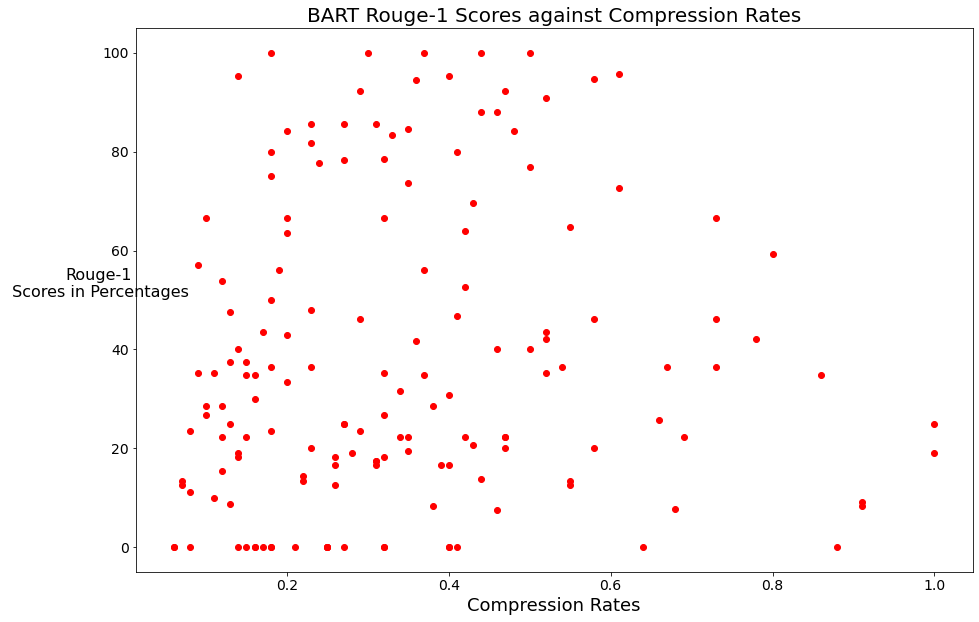

In [47]:
# BART rouge-scores against compression rate of original texts

# Compression Rates against ROUGE scores

# Set markers and colours
markers = ["o" , "x" , "^" , "v"]
colors = ['r','b','k','g']

cr = pd.DataFrame(original_lengths["Compression Rates"])
df = pd.concat([rouge1_score_comparison, cr], axis = 1)
 
x1 = plt.scatter(df["Compression Rates"], df["BART Rouge-1"], marker = markers[0], color=colors[0])

plt.title('BART Rouge-1 Scores against Compression Rates', fontsize=20)
plt.xlabel('Compression Rates', fontsize=18)
plt.ylabel('Rouge-1\n Scores in Percentages', fontsize=16, rotation = 0)
 
# Plot linear regression lines through scatter plots
x = df["Compression Rates"]
y1 = df["BART Rouge-1"]
y2 = df["Pegasus Rouge-1"]
y3 = df["T5 Rouge-1"]
y4 = df["Prophetnet Rouge-1"]

# plt.plot(x,y1)

# Move the legend to an empty part of the plot
# plt.legend((x1, x2, x3, x4),('BART'), loc='upper right', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().set_size_inches((15, 10))    
plt.show()

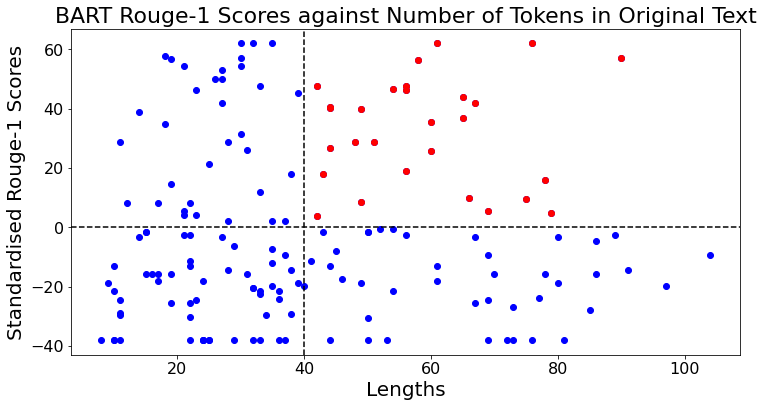

In [48]:
# BART rouge-scores against length of original text and length of generated summary

lengths1 = pd.DataFrame(original_lengths["Original Text Length"])
lengths2 = pd.DataFrame(pred_lengths["BART Prediction Length"])
df = pd.concat([rouge1_score_comparison, lengths1, lengths2], axis = 1)
df2 = df[df["BART Rouge-1"] > mean(df["BART Rouge-1"])]
df2 = df2[df2["Original Text Length"] >= 41]

standardise1 = df["BART Rouge-1"] - mean(df["BART Rouge-1"])
standardise2 = df2["BART Rouge-1"] - mean(df["BART Rouge-1"])

x1 = plt.scatter(df["Original Text Length"], standardise1, marker = markers[0], color=colors[1])
x2 = plt.scatter(df2["Original Text Length"], standardise2, marker = markers[0], color=colors[0])

plt.title('BART Rouge-1 Scores against Number of Tokens in Original Text', fontsize=22)
plt.xlabel('Lengths', fontsize=20)
plt.ylabel('Standardised Rouge-1 Scores', fontsize=20)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=40, color='k', linestyle='--') # set at 40 as that is the average number of tokens per original text

# Move the legend to an empty part of the plot
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gcf().set_size_inches((12, 6))    
plt.show()

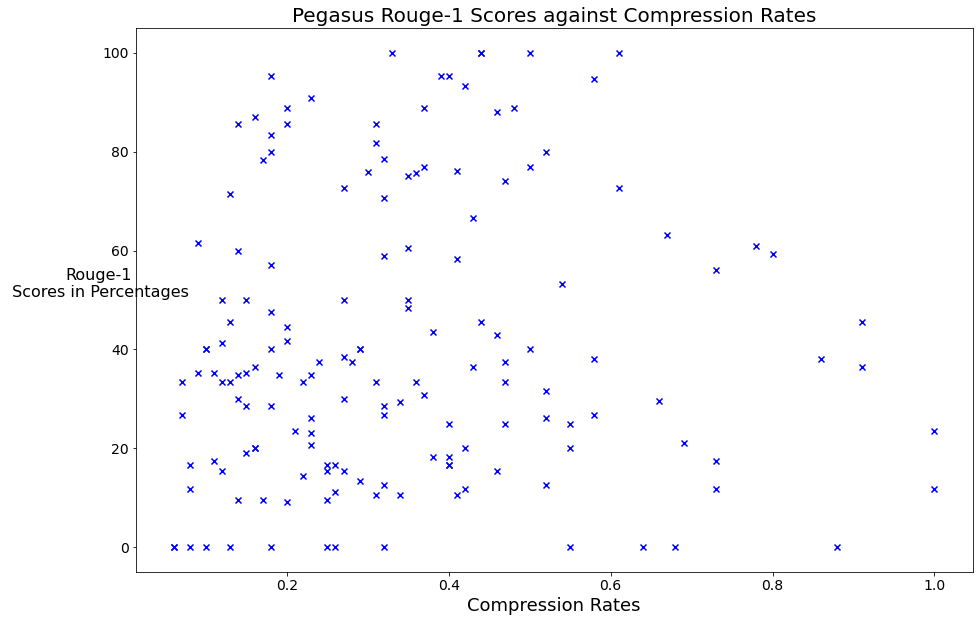

In [49]:
# Pegasus Rouge scores against compression rates
df = pd.concat([rouge1_score_comparison, cr], axis = 1)
x2 = plt.scatter(df["Compression Rates"], df["Pegasus Rouge-1"], marker = markers[1], color=colors[1])
plt.title('Pegasus Rouge-1 Scores against Compression Rates', fontsize=20)
plt.xlabel('Compression Rates', fontsize=18)
plt.ylabel('Rouge-1\n Scores in Percentages', fontsize=16, rotation = 0)

# Move the legend to an empty part of the plot
# plt.legend((x1, x2, x3, x4),('Pegasus'), loc='upper right', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().set_size_inches((15, 10))    
plt.show()

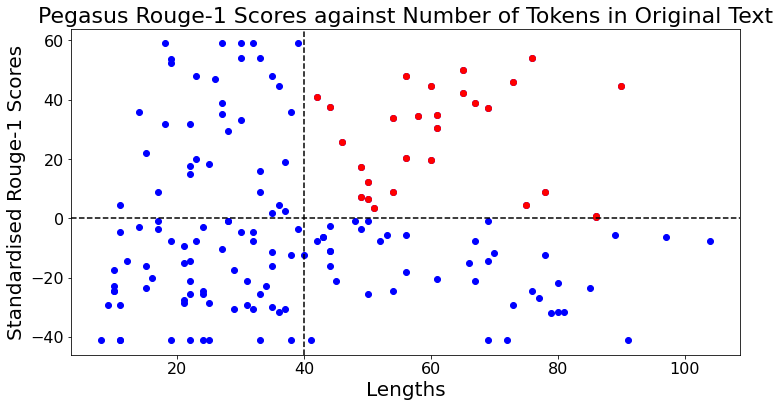

In [50]:
# Pegasus rouge-scores against length of original text and length of generated summary

lengths1 = pd.DataFrame(original_lengths["Original Text Length"])
lengths2 = pd.DataFrame(pred_lengths["Pegasus Prediction Length"])
df = pd.concat([rouge1_score_comparison, lengths1, lengths2], axis = 1)
df2 = df[df["Pegasus Rouge-1"] > mean(df["Pegasus Rouge-1"])]
df2 = df2[df2["Original Text Length"] >= 41]

standardise1 = df["Pegasus Rouge-1"] - mean(df["Pegasus Rouge-1"])
standardise2 = df2["Pegasus Rouge-1"] - mean(df["Pegasus Rouge-1"])

x1 = plt.scatter(df["Original Text Length"], standardise1, marker = markers[0], color=colors[1])
x2 = plt.scatter(df2["Original Text Length"], standardise2, marker = markers[0], color=colors[0])

plt.title('Pegasus Rouge-1 Scores against Number of Tokens in Original Text', fontsize=22)
plt.xlabel('Lengths', fontsize=20)
plt.ylabel('Standardised Rouge-1 Scores', fontsize=20)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=40, color='k', linestyle='--') # set at 40 as that is the average number of tokens per original text

# Move the legend to an empty part of the plot
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gcf().set_size_inches((12, 6))    
plt.show()

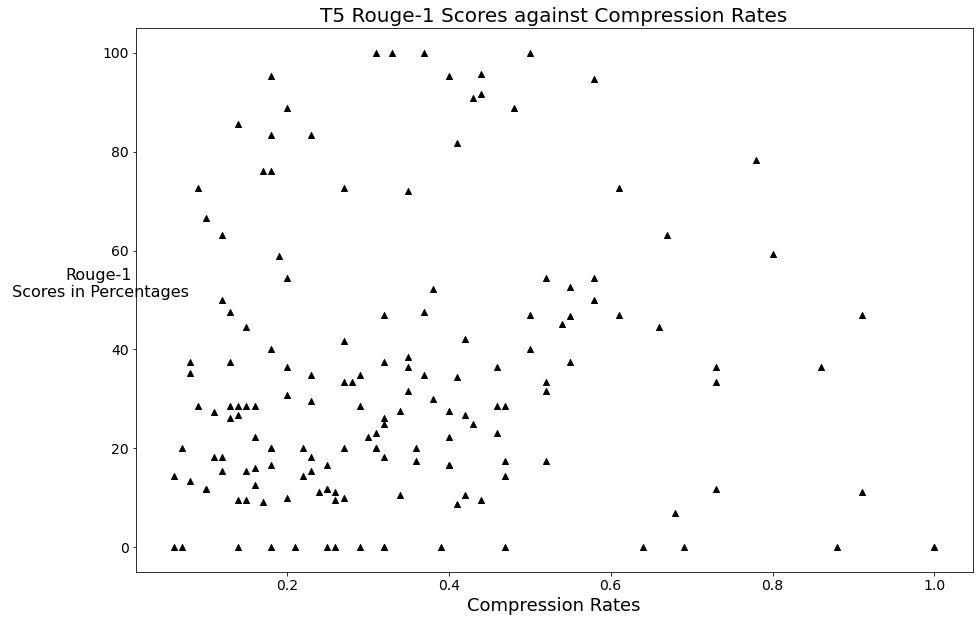

In [51]:
# T5 Rouge scores against compression rates
df = pd.concat([rouge1_score_comparison, cr], axis = 1)
x3 = plt.scatter(df["Compression Rates"], df["T5 Rouge-1"], marker = markers[2], color=colors[2])
plt.title('T5 Rouge-1 Scores against Compression Rates', fontsize=20)
plt.xlabel('Compression Rates', fontsize=18)
plt.ylabel('Rouge-1\n Scores in Percentages', fontsize=16, rotation = 0)

# Move the legend to an empty part of the plot
# plt.legend((x1, x2, x3, x4),('T5'), loc='upper right', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().set_size_inches((15, 10))    
plt.show()

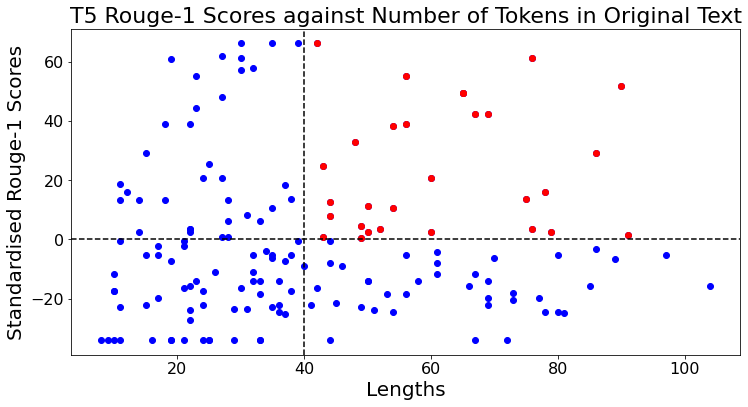

In [52]:
# T5 rouge-scores against length of original text and length of generated summary

lengths1 = pd.DataFrame(original_lengths["Original Text Length"])
lengths2 = pd.DataFrame(pred_lengths["T5 Prediction Length"])
df = pd.concat([rouge1_score_comparison, lengths1, lengths2], axis = 1)
df2 = df[df["T5 Rouge-1"] > mean(df["T5 Rouge-1"])]
df2 = df2[df2["Original Text Length"] >= 41]

standardise1 = df["T5 Rouge-1"] - mean(df["T5 Rouge-1"])
standardise2 = df2["T5 Rouge-1"] - mean(df["T5 Rouge-1"])

x1 = plt.scatter(df["Original Text Length"], standardise1, marker = markers[0], color=colors[1])
x2 = plt.scatter(df2["Original Text Length"], standardise2, marker = markers[0], color=colors[0])

plt.title('T5 Rouge-1 Scores against Number of Tokens in Original Text', fontsize=22)
plt.xlabel('Lengths', fontsize=20)
plt.ylabel('Standardised Rouge-1 Scores', fontsize=20)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=40, color='k', linestyle='--') # set at 40 as that is the average number of tokens per original text

# Move the legend to an empty part of the plot
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gcf().set_size_inches((12, 6))    
plt.show()

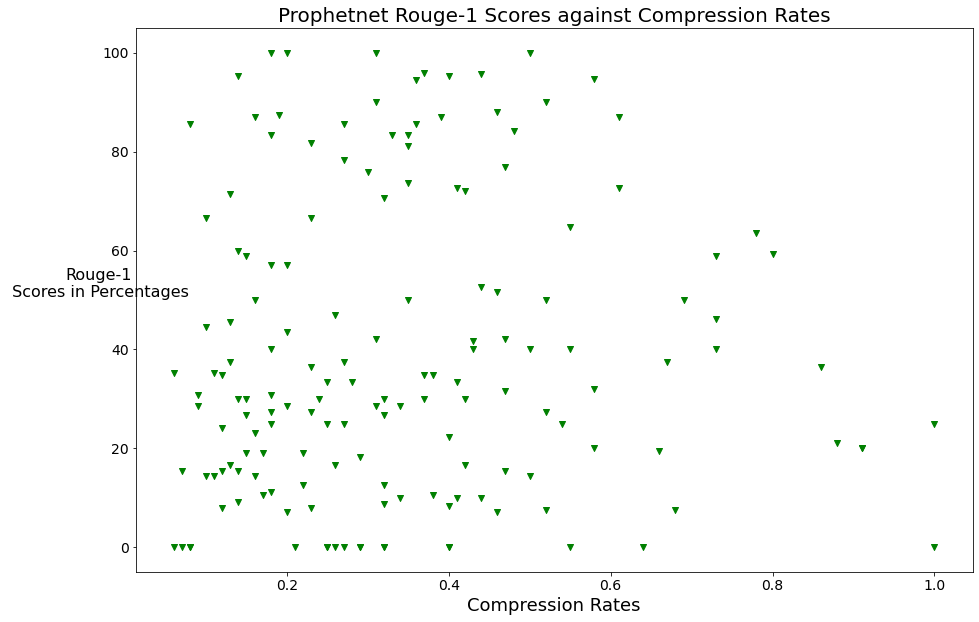

In [53]:
# Prophetnet Rouge scores against compression rates

df = pd.concat([rouge1_score_comparison, cr], axis = 1)
x4 = plt.scatter(df["Compression Rates"], df["Prophetnet Rouge-1"], marker = markers[3], color=colors[3])
plt.title('Prophetnet Rouge-1 Scores against Compression Rates', fontsize=20)
plt.xlabel('Compression Rates', fontsize=18)
plt.ylabel('Rouge-1\n Scores in Percentages', fontsize=16, rotation = 0)

# Move the legend to an empty part of the plot
# plt.legend((x1, x2, x3, x4),("Prophetnet"), loc='upper right', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().set_size_inches((15, 10))    
plt.show()

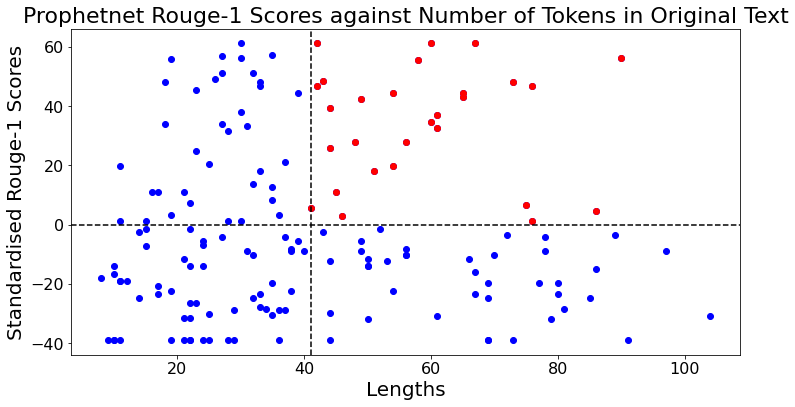

In [54]:
# Prophetnet rouge-scores against length of original text and length of generated summary

lengths1 = pd.DataFrame(original_lengths["Original Text Length"])
lengths2 = pd.DataFrame(pred_lengths["Prophetnet Prediction Length"])
df = pd.concat([rouge1_score_comparison, lengths1, lengths2], axis = 1)
df2 = df[df["Prophetnet Rouge-1"] > mean(df["Prophetnet Rouge-1"])]
df2 = df2[df2["Original Text Length"] >= 41]

standardise1 = df["Prophetnet Rouge-1"] - mean(df["Prophetnet Rouge-1"])
standardise2 = df2["Prophetnet Rouge-1"] - mean(df["Prophetnet Rouge-1"])

x1 = plt.scatter(df["Original Text Length"], standardise1, marker = markers[0], color=colors[1])
x2 = plt.scatter(df2["Original Text Length"], standardise2, marker = markers[0], color=colors[0])

plt.title('Prophetnet Rouge-1 Scores against Number of Tokens in Original Text', fontsize=22)
plt.xlabel('Lengths', fontsize=20)
plt.ylabel('Standardised Rouge-1 Scores', fontsize=20)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=41, color='k', linestyle='--') # set at 41 as that is the average number of tokens per original text

# Move the legend to an empty part of the plot
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gcf().set_size_inches((12, 6))    
plt.show()

In [55]:
# Large Rouge List
large_rouge_comparison_df = pd.concat([bart_results, peg_results, proph_results, t5_results], axis = 1)
columns = ["Rouge-1", "Rouge-2", "Rouge-L","Rouge-1", "Rouge-2", "Rouge-L","Rouge-1", "Rouge-2", "Rouge-L","Rouge-1", "Rouge-2", "Rouge-L"]
large_rouge_comparison_df = large_rouge_comparison_df.set_axis(columns, axis = "columns")
large_rouge_comparison_df.head()

,Rouge-1,Rouge-2,Rouge-L,Rouge-1,Rouge-2,Rouge-L,Rouge-1,Rouge-2,Rouge-L,Rouge-1,Rouge-2,Rouge-L
0,0.00,0.00,0.00,16.67,0.00,16.67,33.33,0.00,33.33,16.67,0.00,16.67
1,53.85,33.33,46.15,50.00,36.36,41.67,34.78,18.18,26.09,50.00,36.36,41.67
2,46.15,25.00,46.15,56.00,26.09,48.00,46.15,25.00,46.15,36.36,10.00,27.27
3,20.69,0.00,20.69,66.67,42.42,53.33,41.67,16.00,25.00,25.00,8.00,25.00
4,36.36,19.05,36.36,40.00,30.77,40.00,25.00,8.70,16.67,20.00,0.00,20.00


In [56]:
# Create nested columns
headers = ["BART", "Pegasus", "Prophetnet", "T5"]
rouges = ["Rouge-1", "Rouge-2", "Rouge-L"]
header_pairs = []
for i in headers:
  for v in rouges:
    x = (i,v)
    header_pairs.append(x)

header_pairs

[('BART', 'Rouge-1'),
 ('BART', 'Rouge-2'),
 ('BART', 'Rouge-L'),
 ('Pegasus', 'Rouge-1'),
 ('Pegasus', 'Rouge-2'),
 ('Pegasus', 'Rouge-L'),
 ('Prophetnet', 'Rouge-1'),
 ('Prophetnet', 'Rouge-2'),
 ('Prophetnet', 'Rouge-L'),
 ('T5', 'Rouge-1'),
 ('T5', 'Rouge-2'),
 ('T5', 'Rouge-L')]

In [57]:
# Set columns of the large comparisons dataframe
large_rouge_comparison_df.columns = pd.MultiIndex.from_tuples(header_pairs)
large_rouge_comparison_df.head()

BART                 Pegasus  ... Prophetnet      T5                
  Rouge-1 Rouge-2 Rouge-L Rouge-1  ...    Rouge-L Rouge-1 Rouge-2 Rouge-L
0  0.00    0.00    0.00    16.67   ...  33.33      16.67   0.00    16.67 
1  53.85   33.33   46.15   50.00   ...  26.09      50.00   36.36   41.67 
2  46.15   25.00   46.15   56.00   ...  46.15      36.36   10.00   27.27 
3  20.69   0.00    20.69   66.67   ...  25.00      25.00   8.00    25.00 
4  36.36   19.05   36.36   40.00   ...  16.67      20.00   0.00    20.00 

[5 rows x 12 columns]

In [58]:
# Average Rouge-1,2,L for BART
averages = []
for i in [0,1,2]:
  x = large_rouge_comparison_df.BART.iloc[:,i]
  x = mean(x)
  averages.append(x)

BART_averages = pd.DataFrame({"Rouge Score": ["Rouge-1", "Rouge-2", "Rouge-L"], "Score": averages})
BART_averages

,Rouge Score,Score
0,Rouge-1,38.023899
1,Rouge-2,24.491887
2,Rouge-L,35.922201


In [59]:
# Average Rouge-1,2,L for T5
averages = []
for i in [0,1,2]:
  x = large_rouge_comparison_df.T5.iloc[:,i]
  x = mean(x)
  averages.append(x)

t5_averages = pd.DataFrame({"Rouge Score": ["Rouge-1", "Rouge-2", "Rouge-L"], "Score": averages})
t5_averages

,Rouge Score,Score
0,Rouge-1,33.916415
1,Rouge-2,18.380377
2,Rouge-L,32.002956


In [60]:
# Average Rouge-1,2,L for Pegasus
averages = []
for i in [0,1,2]:
  x = large_rouge_comparison_df.Pegasus.iloc[:,i]
  x = mean(x)
  averages.append(x)

peg_averages = pd.DataFrame({"Rouge Score": ["Rouge-1", "Rouge-2", "Rouge-L"], "Score": averages})
peg_averages

,Rouge Score,Score
0,Rouge-1,41.046352
1,Rouge-2,24.639748
2,Rouge-L,38.869623


In [61]:
# Average Rouge-1,2,L for Prophetnet
averages = []
for i in [0,1,2]:
  x = large_rouge_comparison_df.Prophetnet.iloc[:,i]
  x = mean(x)
  averages.append(x)

proph_averages = pd.DataFrame({"Rouge Score": ["Rouge-1", "Rouge-2", "Rouge-L"], "Score": averages})
proph_averages

,Rouge Score,Score
0,Rouge-1,38.916101
1,Rouge-2,24.195031
2,Rouge-L,36.995912


In [62]:
# New columns with model names
# Creating a single column of rouge-scores with another column with their respective rouge-score types
#T5
t5_r1 = pd.DataFrame(t5_results["rouge-1"])
t5_r1 = t5_r1.set_axis(["Score"], axis = "columns")
t5_r1["Rouge-Score"] = "Rouge-1"

t5_r2 = pd.DataFrame(t5_results["rouge-2"])
t5_r2 = t5_r2.set_axis(["Score"], axis = "columns")
t5_r2["Rouge-Score"] = "Rouge-2"

t5_rL = pd.DataFrame(t5_results["rouge-l"])
t5_rL = t5_rL.set_axis(["Score"], axis = "columns")
t5_rL["Rouge-Score"] = "Rouge-L"

t5 = pd.concat([t5_r1,t5_r2,t5_rL], axis = 0)
t5["Model"] = "T5"

#Prophetnet
proph_r1 = pd.DataFrame(proph_results["rouge-1"])
proph_r1 = proph_r1.set_axis(["Score"], axis = "columns")
proph_r1["Rouge-Score"] = "Rouge-1"

proph_r2 = pd.DataFrame(proph_results["rouge-2"])
proph_r2 = proph_r2.set_axis(["Score"], axis = "columns")
proph_r2["Rouge-Score"] = "Rouge-2"

proph_rL = pd.DataFrame(proph_results["rouge-l"])
proph_rL = proph_rL.set_axis(["Score"], axis = "columns")
proph_rL["Rouge-Score"] = "Rouge-L"

proph = pd.concat([proph_r1,proph_r2,proph_rL], axis = 0)
proph["Model"] = "Prophetnet"

top_model_comparison = pd.concat([t5, proph],  axis = 0)

In [63]:
# view the df
top_model_comparison.head()

,Score,Rouge-Score,Model
0,16.67,Rouge-1,T5
1,50.00,Rouge-1,T5
2,36.36,Rouge-1,T5
3,25.00,Rouge-1,T5
4,20.00,Rouge-1,T5


In [64]:
# New columns with model names
# Creating a single column of rouge-scores with another column with their respective rouge-score types
#T5
t5_r1 = pd.DataFrame(t5_results["rouge-1"])
t5_r1 = t5_r1.set_axis(["Score"], axis = "columns")
t5_r1["Rouge-Score"] = "Rouge-1"

t5_r2 = pd.DataFrame(t5_results["rouge-2"])
t5_r2 = t5_r2.set_axis(["Score"], axis = "columns")
t5_r2["Rouge-Score"] = "Rouge-2"

t5_rL = pd.DataFrame(t5_results["rouge-l"])
t5_rL = t5_rL.set_axis(["Score"], axis = "columns")
t5_rL["Rouge-Score"] = "Rouge-L"

t5 = pd.concat([t5_r1,t5_r2,t5_rL], axis = 0)
t5["Model"] = "T5"

#Prophetnet
proph_r1 = pd.DataFrame(proph_results["rouge-1"])
proph_r1 = proph_r1.set_axis(["Score"], axis = "columns")
proph_r1["Rouge-Score"] = "Rouge-1"

proph_r2 = pd.DataFrame(proph_results["rouge-2"])
proph_r2 = proph_r2.set_axis(["Score"], axis = "columns")
proph_r2["Rouge-Score"] = "Rouge-2"

proph_rL = pd.DataFrame(proph_results["rouge-l"])
proph_rL = proph_rL.set_axis(["Score"], axis = "columns")
proph_rL["Rouge-Score"] = "Rouge-L"

proph = pd.concat([proph_r1,proph_r2,proph_rL], axis = 0)
proph["Model"] = "Prophetnet"

# New columns with model names
# Creating a single column of rouge-scores with another column with their respective rouge-score types
#T5
peg_r1 = pd.DataFrame(peg_results["rouge-1"])
peg_r1 = peg_r1.set_axis(["Score"], axis = "columns")
peg_r1["Rouge-Score"] = "Rouge-1"

peg_r2 = pd.DataFrame(peg_results["rouge-2"])
peg_r2 = peg_r2.set_axis(["Score"], axis = "columns")
peg_r2["Rouge-Score"] = "Rouge-2"

peg_rL = pd.DataFrame(peg_results["rouge-l"])
peg_rL = peg_rL.set_axis(["Score"], axis = "columns")
peg_rL["Rouge-Score"] = "Rouge-L"

peg = pd.concat([peg_r1,peg_r2,peg_rL], axis = 0)
peg["Model"] = "Pegasus"

#Prophetnet
bart_r1 = pd.DataFrame(bart_results["rouge-1"])
bart_r1 = bart_r1.set_axis(["Score"], axis = "columns")
bart_r1["Rouge-Score"] = "Rouge-1"

bart_r2 = pd.DataFrame(bart_results["rouge-2"])
bart_r2 = bart_r2.set_axis(["Score"], axis = "columns")
bart_r2["Rouge-Score"] = "Rouge-2"

bart_rL = pd.DataFrame(bart_results["rouge-l"])
bart_rL = bart_rL.set_axis(["Score"], axis = "columns")
bart_rL["Rouge-Score"] = "Rouge-L"

bart = pd.concat([bart_r1,bart_r2,bart_rL], axis = 0)
bart["Model"] = "BART"

top_model_comparison = pd.concat([peg, bart,t5, proph],  axis = 0)

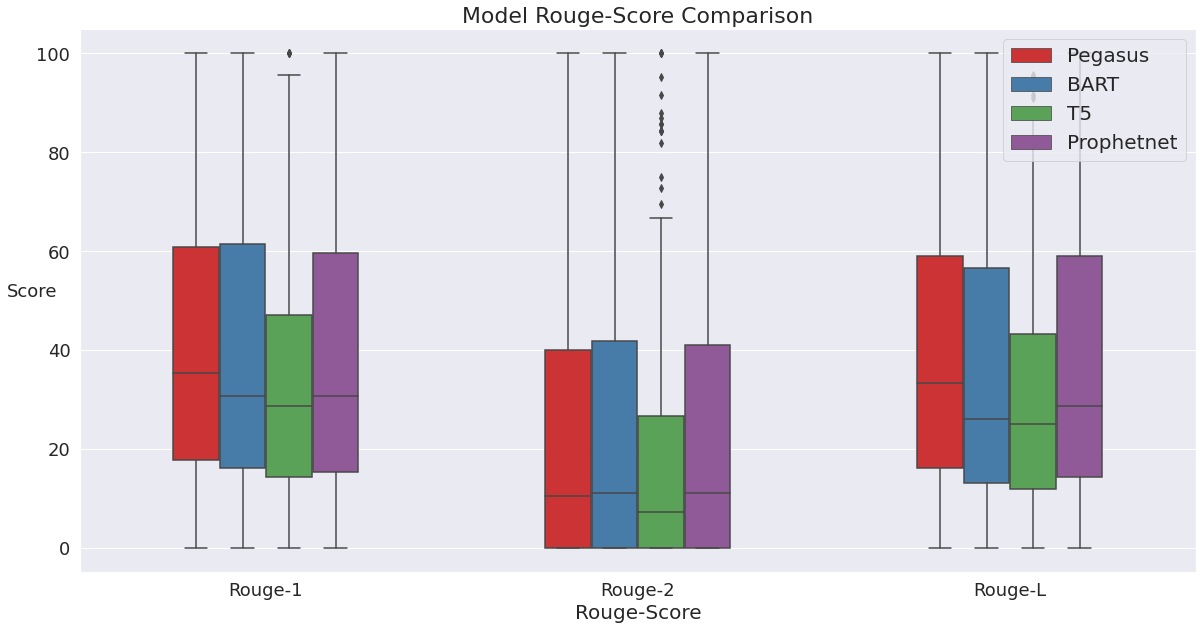

In [95]:
# Create box plot of rouge scores 
sns.set(style="darkgrid")
df = top_model_comparison

sns.boxplot(x="Rouge-Score", y="Score", hue="Model", data=df, palette="Set1", width=0.5)
plt.title('Model Rouge-Score Comparison', fontsize=22)
plt.gcf().set_size_inches((20, 10))  
plt.xlabel('Rouge-Score', fontsize=20)
plt.ylabel('Score', fontsize=18, rotation = 0)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper right', fontsize=20)
plt.show()

In [66]:
# Mean Rouge-1 Rouge-2 Rouge-L Scores
peg_mean_r1 = mean(peg_results["rouge-1"])
peg_mean_r2 = mean(peg_results["rouge-2"])
peg_mean_rL = mean(peg_results["rouge-l"])
peg_means = pd.DataFrame([peg_mean_r1,peg_mean_r2,peg_mean_rL], columns = ["Pegasus"])
peg_means.set_axis(["Rouge-1", "Rouge-2","Rouge-L"])

proph_mean_r1 = mean(proph_results["rouge-1"])
proph_mean_r2 = mean(proph_results["rouge-2"])
proph_mean_rL = mean(proph_results["rouge-l"])
proph_means = pd.DataFrame([proph_mean_r1,proph_mean_r2,proph_mean_rL], columns = ["Prophetnet"])
proph_means.set_axis(["Rouge-1", "Rouge-2","Rouge-L"])

bart_mean_r1 = mean(bart_results["rouge-1"])
bart_mean_r2 = mean(bart_results["rouge-2"])
bart_mean_rL = mean(bart_results["rouge-l"])
bart_means = pd.DataFrame([bart_mean_r1,bart_mean_r2,bart_mean_rL], columns = ["BART"])
bart_means.set_axis(["Rouge-1", "Rouge-2","Rouge-L"])

t5_mean_r1 = mean(t5_results["rouge-1"])
t5_mean_r2 = mean(t5_results["rouge-2"])
t5_mean_rL = mean(t5_results["rouge-l"])
t5_means = pd.DataFrame([t5_mean_r1,t5_mean_r2,t5_mean_rL], columns = ["T5"])
t5_means.set_axis(["Rouge-1", "Rouge-2","Rouge-L"])

mean_comparisons = pd.concat([peg_means, proph_means, bart_means,t5_means], axis = 1)
mean_comparisons = mean_comparisons.set_axis(["Rouge-1", "Rouge-2","Rouge-L"])

In [67]:
mean_comparisons = mean_comparisons.round(2)

In [68]:
mean_comparisons

,Pegasus,Prophetnet,BART,T5
Rouge-1,41.05,38.92,38.02,33.92
Rouge-2,24.64,24.20,24.49,18.38
Rouge-L,38.87,37.00,35.92,32.00


Checking Repetition in Predicted Summaries 

In [69]:
# Combine the dataframes
pred_full_df = pd.concat([bart_preds, t5_preds, peg_preds, proph_preds, tac_test.Summary], axis = 1)

In [70]:
# Rearrange columns and view combined dataframe
column_names = ["BART Prediction", "T5 Prediction", "Pegasus Prediction", "Prophetnet Prediction", "Summary"]
pred_full_df = pred_full_df.set_axis(column_names, axis = "columns")
pred_full_df

,BART Prediction,T5 Prediction,Pegasus Prediction,Prophetnet Prediction,Summary
0,open only to individual users,the service makes public your data public,the service is open to the public,open humans can make their data public under the free software license,you can choose the copyright license
1,this service does not share your personal information with third parties outside of google unless you are,this service does not share your personal information with companies or individuals outside of google,this service does not share your personal information with companies or individuals outside of google,this service does not allow third parties to access your personal information without your consent,google can share your personal information with other parties
2,amazon allows users to request access and deletion of personal info,you can request access to correct delete,you can request access to correct deletion of your account,shopify allows users to request access and deletion of personal info,you may have the right to request access correction and or deletion of your data
3,when you have a service account you are notified a month or more in advance,you can terminate your account without a reason,if you materially breach the terms you publish you can terminate your account within 30 days,you must delete your account after 30 days,if you materially breach the terms of service the service gives 30 days of notice before terminating your account
4,your personal data may be deleted without reason and may be used at any time,you can suspend disrupt or discontinue the platform any part of the platform,the service can suspend or discontinue the service any part of the service at any time and without notice to you,the service may suspend disrupt or discontinue your account without prior notice and without a reason,they may stop providing the service at any time
...,...,...,...,...,...
154,you publish your content under a free software license,the service reserves the right to use the site without a license,the service reserves no copyright license or license whatsoever in the content,this service keeps a license on user generated content even after users close their accounts,null due to irrelevancy
155,the service can delete your account without prior notice and without a reason,the service reserves the right to terminate your access,the service reserves the right to terminate your access to the service,this service can delete your account without a reason,this service can delete your content if you violate the terms
156,tracking via third party cookies for advertising without your consent,targeted advertising is used for targeted advertising,targeted advertising is used for advertising,you are targeted advertising in the future of personal data,personal data is used for advertising
157,the service can use your ideas for all their existing and future services,the service can use any information you provide about the service,the service can use any information provided by the service without prior notice for purposes,this service does not use you or your content,this service takes credit for your content


In [71]:
# Replace words with numbers from dictionary
pred_full_numbered_df = pred_full_df.copy()

pred_full_numbered_df = pred_full_numbered_df.applymap(lambda x: x.split(" "))

In [72]:
# Define a function to count duplicates in the rows
def counter(row):
  count = 0
  if len(row) == len(set(row)):
        return 0
  else:
        return len(row) - len(set(row))

In [73]:
# Create Dataframe
pred_full_numbered_df = pred_full_numbered_df.applymap(counter)
pred_full_numbered_df.head()

,BART Prediction,T5 Prediction,Pegasus Prediction,Prophetnet Prediction,Summary
0,0,1,1,0,0
1,0,0,0,1,0
2,0,0,0,0,0
3,2,0,2,0,3
4,2,2,5,1,0


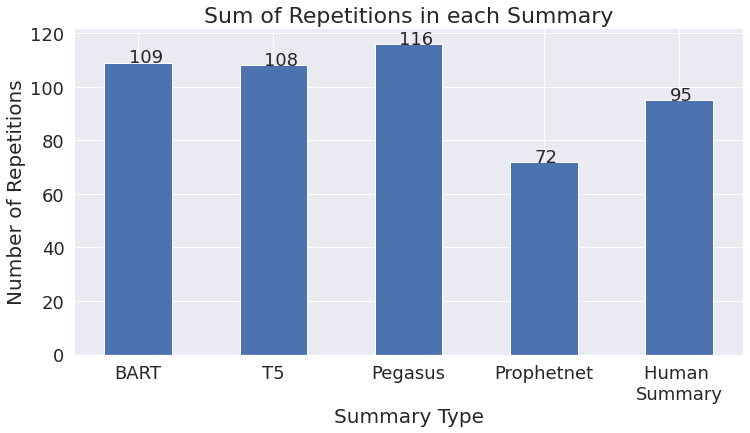

In [74]:
# Sum each column
x = ["BART Prediction",	"T5 Prediction",	"Pegasus Prediction",	"Prophetnet Prediction",	"Summary"]
y = [sum(pred_full_numbered_df[i]) for i in x]
x = ["BART",	"T5",	"Pegasus",	"Prophetnet",	"Human \nSummary"]

# The X position of bars
r1 = [1,3,5,7,9]

# Bar width
barWidth = 1

# Create bars and choose color
plt.bar(r1, y, width = barWidth, color = "b")
 
# Add title and axis names
plt.title('Sum of Repetitions in each Summary', fontsize=22)
plt.xlabel('Summary Type', fontsize=20)
plt.ylabel('Number of Repetitions', fontsize=20)
 
# Create names on the x axis
plt.xticks(r1, x)
 
plt.gcf().set_size_inches((12, 6))  
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Create labels
label = [str(i) for i in y]
 
# Text on the top of each bar
for i in range(len(x)):
    plt.text(x = r1[i]-0.14, y = y[i], s = label[i], size = 18)

# Show graph
plt.show()

In [75]:
N = 5
menMeans = (20, 35, 30, 35, -27)
menStd = (2, 3, 4, 1, 2)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

## Extrinsic Evaluation

In [76]:
# View example of extrinsic rating
intrinsic1.head()

,BART,T5,Pegasus,Prophetnet,Summary
0,1,0,1,0,1
1,0,1,1,1,1
2,1,0,0,1,0
3,1,1,0,1,1
4,1,0,0,1,1


In [77]:
# Get average extrinsic rating score for each summary
intrinsic_sum = intrinsic1 + intrinsic2 + intrinsic3 + intrinsic4 + intrinsic5 + intrinsic6 + intrinsic7 + intrinsic8 + intrinsic9 + intrinsic10
intrinsic_averages = intrinsic_sum / 10
intrinsic_averages.head()

,BART,T5,Pegasus,Prophetnet,Summary
0,1.0,0.0,1.0,0.1,0.9
1,0.6,1.0,1.0,1.0,1.0
2,0.8,0.0,0.6,1.0,0.9
3,0.9,1.0,0.3,1.0,1.0
4,1.0,0.0,0.0,1.0,1.0


No handles with labels found to put in legend.


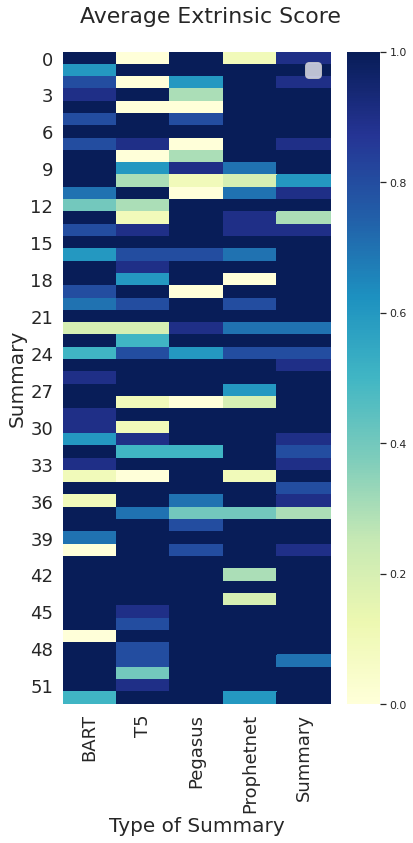

In [78]:
# Heatmaps of correlation between whether summaries are extrinsically satisfactory

# plot using a color palette
sns.heatmap(intrinsic_averages, cmap="YlGnBu")
plt.title('     Average Extrinsic Score \n', fontsize=22)
plt.gcf().set_size_inches((6, 12))  
plt.xticks(fontsize=18, rotation = 90)
plt.yticks(fontsize=18)
plt.xlabel('Type of Summary', fontsize=20)
plt.ylabel('Summary', fontsize=20)
plt.legend(fontsize=20)
sns.set(font_scale=2)
plt.show()

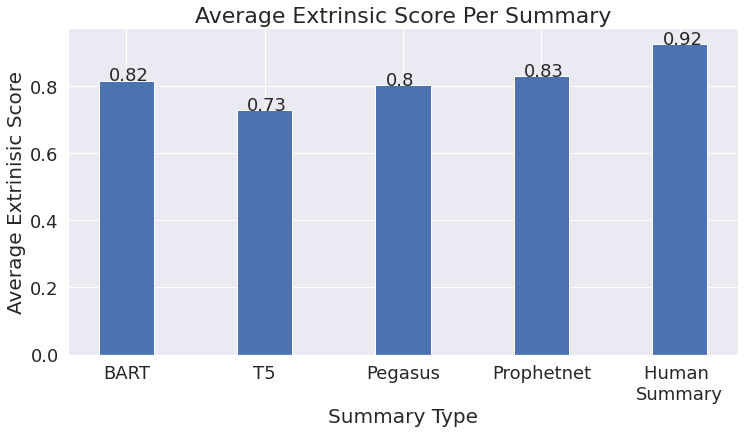

In [79]:
# Plot Mean of averages scores
x1 = mean(intrinsic_averages["BART"])
x2 = mean(intrinsic_averages["T5"])
x3 = mean(intrinsic_averages["Pegasus"])
x4 = mean(intrinsic_averages["Prophetnet"])
x5 = mean(intrinsic_averages["Summary"])

# define variables 
y = [x1, x2, x3, x4, x5]
x = ["BART",	"T5",	"Pegasus",	"Prophetnet",	"Human \nSummary"]

# Create bars and choose color
plt.bar(r1, y, color = "b")
 
# Add title and axis names
plt.title('Average Extrinsic Score Per Summary', fontsize=22)
plt.xlabel('Summary Type', fontsize=20)
plt.ylabel('Average Extrinisic Score', fontsize=20)
 
# Create names on the x axis
plt.xticks(r1, x)
 
plt.gcf().set_size_inches((12, 6))  
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Create labels
r_y = [round(i,2) for i in y]
label = [str(i) for i in r_y]
 
# Text on the top of each bar
for i in range(len(x)):
    plt.text(x = r1[i]-0.25, y = y[i], s = label[i], size = 18)

# Show graph
plt.show()

## Extrinsic and Intrinsic Correlation

In [80]:
#Create intrinsic dataframe to combine with extrinsic
bart_int = pd.DataFrame(intrinsic_averages["BART"])
bart_int = bart_int.set_axis(["Intrinsic Score"], axis = "columns")
bart_int["Model"] = "BART"

t5_int = pd.DataFrame(intrinsic_averages["T5"])
t5_int = t5_int.set_axis(["Intrinsic Score"], axis = "columns")
t5_int["Model"] = "T5"

peg_int = pd.DataFrame(intrinsic_averages["Pegasus"])
peg_int = peg_int.set_axis(["Intrinsic Score"], axis = "columns")
peg_int["Model"] = "Pegasus"

proph_int = pd.DataFrame(intrinsic_averages["Prophetnet"])
proph_int = proph_int.set_axis(["Intrinsic Score"], axis = "columns")
proph_int["Model"] = "Prophetnet"

intrinsic_comparison = pd.concat([peg_int, bart_int,t5_int, proph_int],  axis = 0)

In [89]:
# Redefine comparisons dataframe
peg_small = peg[:53]
bart_small = bart[:53]                
t5_small = t5[:53]     
proph_small = proph[:53]      
                
small_top_model_comparison = pd.concat([peg_small, bart_small, t5_small, proph_small])
model_comparison = small_top_model_comparison[small_top_model_comparison["Rouge-Score"] == "Rouge-1"]

In [90]:
# Define another column with the intrinsic scores
model_comparison["Intrinsic Score"] = intrinsic_comparison["Intrinsic Score"]
model_comparison

,Score,Rouge-Score,Model,Intrinsic Score
0,16.67,Rouge-1,Pegasus,1.0
1,50.00,Rouge-1,Pegasus,1.0
2,56.00,Rouge-1,Pegasus,0.6
3,66.67,Rouge-1,Pegasus,0.3
4,40.00,Rouge-1,Pegasus,0.0
...,...,...,...,...
48,11.11,Rouge-1,Prophetnet,1.0
49,72.73,Rouge-1,Prophetnet,1.0
50,16.67,Rouge-1,Prophetnet,1.0
51,72.73,Rouge-1,Prophetnet,1.0


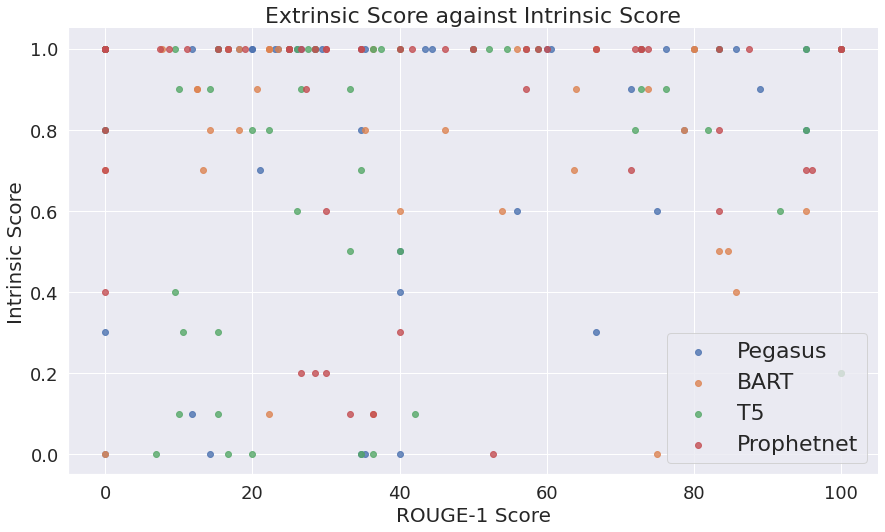

In [91]:
# Plot intrinsic score against extrinsic score

 # Use the 'hue' argument to provide a factor variable
sns.lmplot(x="Score", y="Intrinsic Score", data=model_comparison, fit_reg=False, hue='Model', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='best')
plt.gcf().set_size_inches((16, 8))  
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Add title and axis names
plt.title('Extrinsic Score against Intrinsic Score', fontsize=22)
plt.xlabel('ROUGE-1 Score', fontsize=20)
plt.ylabel('Intrinsic Score', fontsize=20)

plt.show()

In [92]:
# Correlation
import scipy.stats
np.corrcoef(model_comparison["Score"], model_comparison["Intrinsic Score"])
r, p = scipy.stats.pearsonr(model_comparison["Score"], model_comparison["Intrinsic Score"])
print(r)
print(p)

0.04837806530877611
0.4835270445124169


In [93]:
# # Comparisons dataframe to csv
# comparisons.to_csv("full_comparison_dataframe.csv") 

In [94]:
# # Download comparisons
# files.download("full_comparison_dataframe.csv")